# Program2 bonus3 report
bonus1 and bonus2 can be found from PLSI.py

In [1]:
from PLSI import PLSI
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('ggplot')

In [2]:
params = {
    'name' : "model_base",
    'dirName' : "corpus",
    'ext' : "txt",
    'toload' : False, 
    'stopWordList' : ['a','the'], 
    'ignoreCase' : True, 
    'stem' : "snowball", 
    'topicCount' : 8, 
    'iterations' : 8,
    'randomInit' : '',
    'bonus2' : False
}

In [3]:
def plot_comparison(params):
    # base case model
    model_base = PLSI(**params)

    # bonus 1 with random model
    params['name'] = "model_random"
    params['randomInit'] = 'random'
    model_random = PLSI(**params)

    # bonus 1 with dirchlet model
    params['name'] = "model_dirchlet"
    params['randomInit'] = 'dirchlet'
    model_dirchlet = PLSI(**params)

    # bonus 2 with base case model
    params['name'] = "model_base2"
    params['bonus2'] = True
    params['randomInit'] = ''
    model_base2 = PLSI(**params)

    # bonus 2 with random model
    params['name'] = "model_random2"
    params['randomInit'] = 'random'
    params['bonus2'] = True
    model_random2 = PLSI(**params)

    # bonus 2 with dirchlet model
    params['name'] = "model_dirchlet2"
    params['randomInit'] = 'dirchlet'
    params['bonus2'] = True
    model_dirchlet2 = PLSI(**params)
    
    # print the documents I use
    print(model_dirchlet2.documentNameList)
    

    performance = {}

    # base case performance
    performance['base'] = -model_base.documents_evaluation()

    # bonus1 with random model's performance
    performance['b1_random'] = -model_random.documents_evaluation()

    # bonus1 with dirchlet model's performance
    performance['b1_dirchlet'] = -model_dirchlet.documents_evaluation()

    # bonus2 with base model's performance
    performance['b2_base'] = -model_base2.documents_evaluation()

    # bonus2 with random model's performance
    performance['b2_random'] = -model_random2.documents_evaluation()

    # bonus2 with dirchlet model's performance
    performance['b2_dirchlet'] = -model_dirchlet2.documents_evaluation()
    
    # plot the comparison graph
    x = list(performance.keys())
    y = list(performance.values())

    fig, ax = plt.subplots()    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(y))  # the x locations for the groups
    ax.barh(ind, y, width, color=['black', 'red', 'green', 'blue', 'orange', 'yellow'])
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(x, minor=False)
    plt.title("models' average log sum of probabilities(smaller value is better)")
    for i, v in enumerate(y):
        ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

### From the graph below, the observation is that bonus1 with dirchlet option model is the best model with small iterations since it has the smallest value. The performance score is the negative average each sum of the log document probabilities. So a smaller value here means a higher probability. It seems that model with initialized dirichlet distribution perform best, and then the random distribution one.

In [4]:
# this code can also be found in PLSI.py
'''
calculate the averge sum of log probability in all documents
'''
# def document_probability(self,dt,tw,document_words,documentNum,corpus):
#     prosSum = [0] * documentNum
#     for documentIndex in range(documentNum):
#         for ch in document_words[documentIndex]:
#             wordIndex = corpus.index(ch)
#             prosSum[documentIndex] += np.log10(np.dot(tw[:,wordIndex],dt[documentIndex]))
#     return np.round(np.mean(prosSum),4)

'\ncalculate the averge sum of log probability in all documents\n'

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs
['Deepfakes Generation and Detection.txt', 'Mining Sentiment Classification from Political Web Logs.txt', 'Attentive Statistics Pooling for Deep Speaker Embedding.txt', 'Multi-task Learning.txt', 'Learning Surface Text Patterns for a Question Answering System.txt', 'Question Answering by Searching Large Corpora with Linguistic Methods.txt', 'Thumbs up Sentiment Classification using Machine Learning Techniques.txt', 'Deep Learning for Deepfakes Creation and Detection.txt']


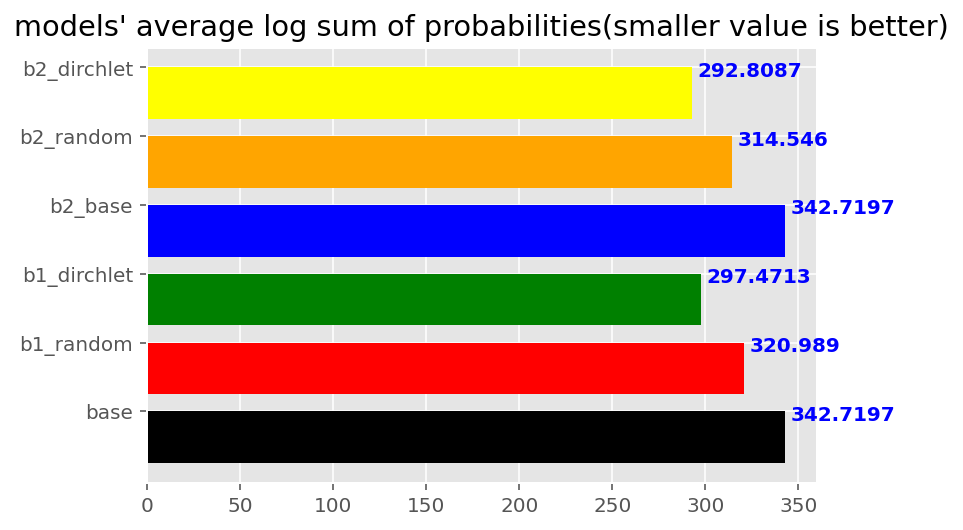

In [5]:
%time
params['iterations'] = 4
plot_comparison(params)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs
['Deepfakes Generation and Detection.txt', 'Mining Sentiment Classification from Political Web Logs.txt', 'Attentive Statistics Pooling for Deep Speaker Embedding.txt', 'Multi-task Learning.txt', 'Learning Surface Text Patterns for a Question Answering System.txt', 'Question Answering by Searching Large Corpora with Linguistic Methods.txt', 'Thumbs up Sentiment Classification using Machine Learning Techniques.txt', 'Deep Learning for Deepfakes Creation and Detection.txt']


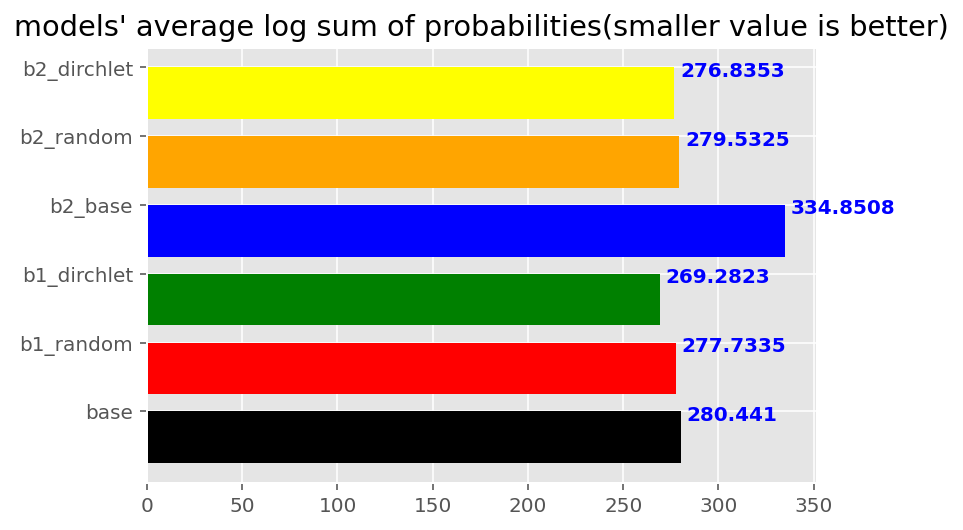

In [6]:
%time
params['iterations'] = 15
plot_comparison(params)

### when iterations increase, the situation may change a little bit. From this graph above, we may see that model with bonus 2 with dirchlet option performs better.

['Deepfakes Generation and Detection.txt', 'Mining Sentiment Classification from Political Web Logs.txt', 'Attentive Statistics Pooling for Deep Speaker Embedding.txt', 'Multi-task Learning.txt', 'Learning Surface Text Patterns for a Question Answering System.txt', 'Question Answering by Searching Large Corpora with Linguistic Methods.txt', 'Thumbs up Sentiment Classification using Machine Learning Techniques.txt', 'Deep Learning for Deepfakes Creation and Detection.txt']
CPU times: user 15 s, sys: 133 ms, total: 15.2 s
Wall time: 14.9 s


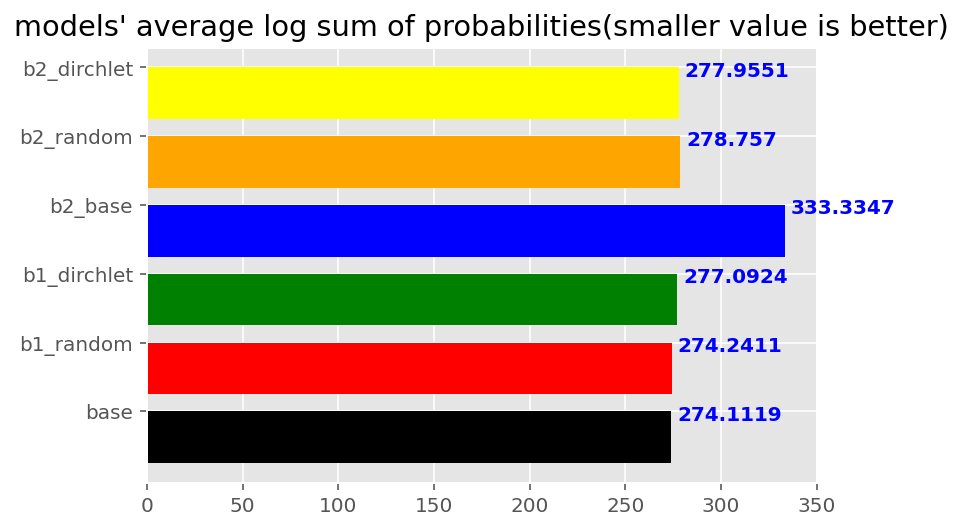

In [7]:
%%time
params['iterations'] = 30
plot_comparison(params)

['Deepfakes Generation and Detection.txt', 'Mining Sentiment Classification from Political Web Logs.txt', 'Attentive Statistics Pooling for Deep Speaker Embedding.txt', 'Multi-task Learning.txt', 'Learning Surface Text Patterns for a Question Answering System.txt', 'Question Answering by Searching Large Corpora with Linguistic Methods.txt', 'Thumbs up Sentiment Classification using Machine Learning Techniques.txt', 'Deep Learning for Deepfakes Creation and Detection.txt']
CPU times: user 49.7 s, sys: 304 ms, total: 50 s
Wall time: 49.7 s


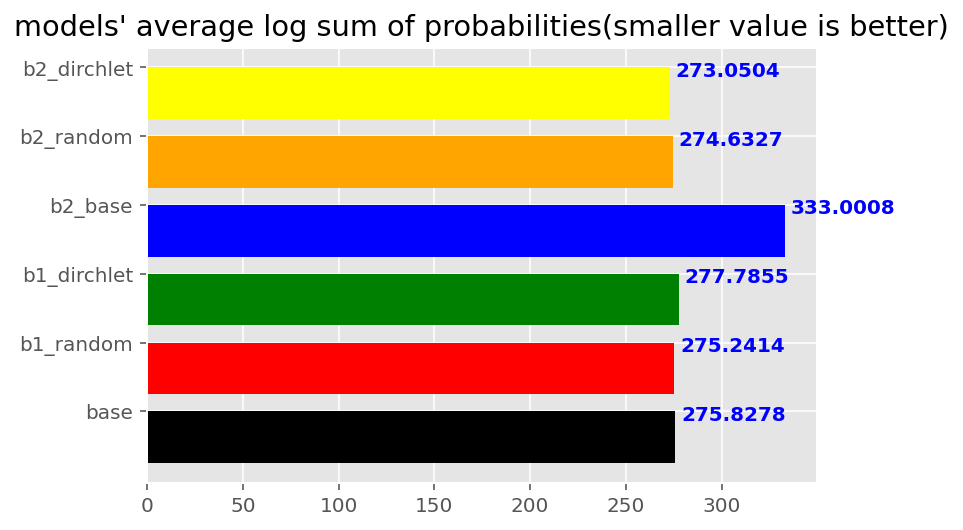

In [8]:
%%time
params['iterations'] = 100
plot_comparison(params)

['Deepfakes Generation and Detection.txt', 'Mining Sentiment Classification from Political Web Logs.txt', 'Attentive Statistics Pooling for Deep Speaker Embedding.txt', 'Multi-task Learning.txt', 'Learning Surface Text Patterns for a Question Answering System.txt', 'Question Answering by Searching Large Corpora with Linguistic Methods.txt', 'Thumbs up Sentiment Classification using Machine Learning Techniques.txt', 'Deep Learning for Deepfakes Creation and Detection.txt']
CPU times: user 1min 39s, sys: 496 ms, total: 1min 39s
Wall time: 1min 39s


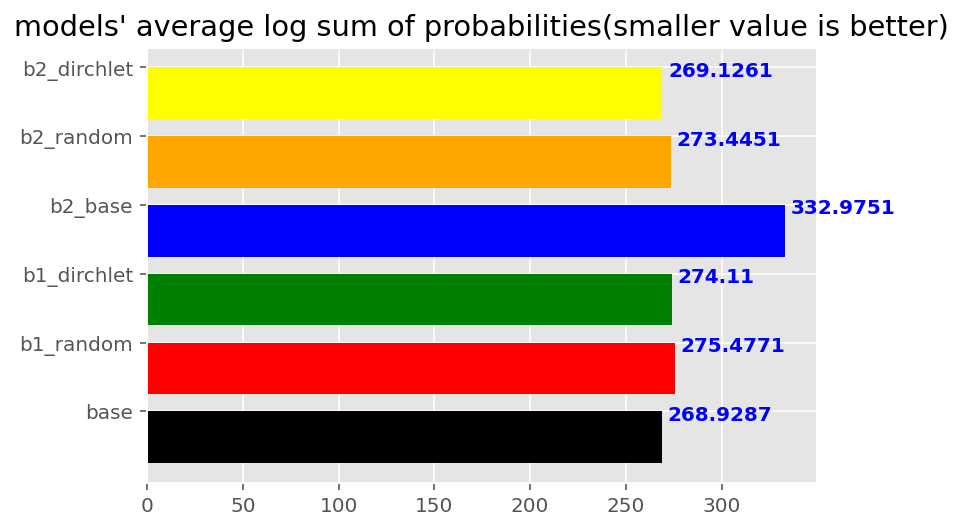

In [9]:
%%time
params['iterations'] = 200
plot_comparison(params)

### if using 500 iterations to test, the base case result seems to be better

['Deepfakes Generation and Detection.txt', 'Mining Sentiment Classification from Political Web Logs.txt', 'Attentive Statistics Pooling for Deep Speaker Embedding.txt', 'Multi-task Learning.txt', 'Learning Surface Text Patterns for a Question Answering System.txt', 'Question Answering by Searching Large Corpora with Linguistic Methods.txt', 'Thumbs up Sentiment Classification using Machine Learning Techniques.txt', 'Deep Learning for Deepfakes Creation and Detection.txt']
CPU times: user 4min 8s, sys: 1.14 s, total: 4min 9s
Wall time: 4min 8s


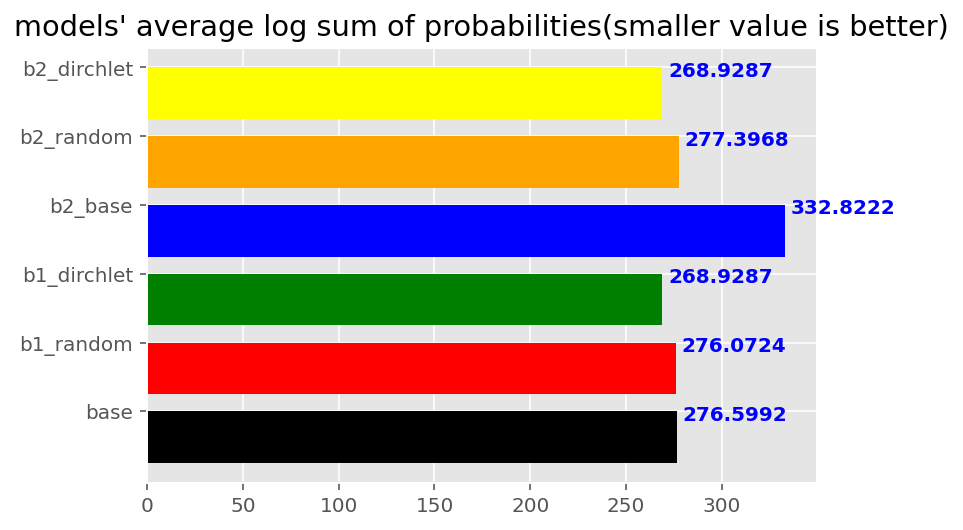

In [10]:
%%time
params['iterations'] = 500
plot_comparison(params)

['Deepfakes Generation and Detection.txt', 'Mining Sentiment Classification from Political Web Logs.txt', 'Attentive Statistics Pooling for Deep Speaker Embedding.txt', 'Multi-task Learning.txt', 'Learning Surface Text Patterns for a Question Answering System.txt', 'Question Answering by Searching Large Corpora with Linguistic Methods.txt', 'Thumbs up Sentiment Classification using Machine Learning Techniques.txt', 'Deep Learning for Deepfakes Creation and Detection.txt']
CPU times: user 8min 15s, sys: 2.21 s, total: 8min 17s
Wall time: 8min 16s


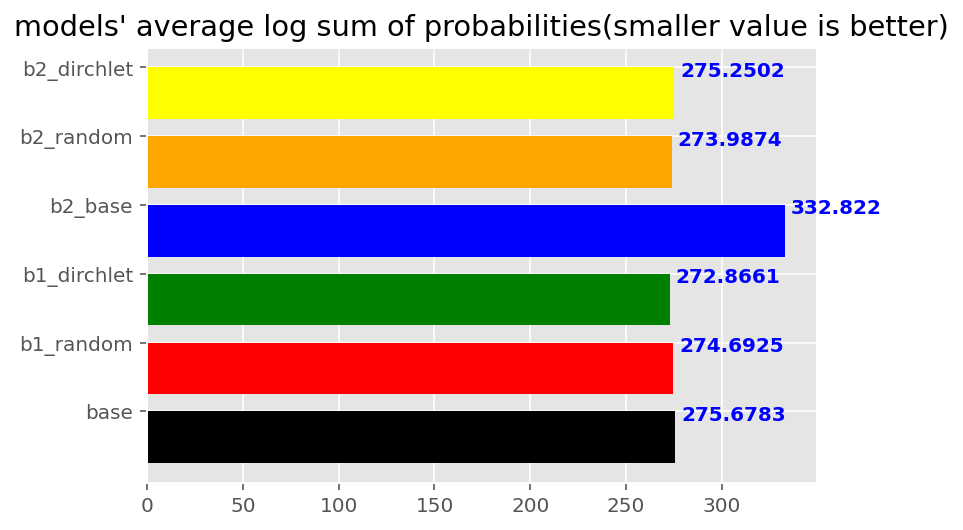

In [11]:
%%time
params['iterations'] = 1000
plot_comparison(params)

['Deepfakes Generation and Detection.txt', 'Mining Sentiment Classification from Political Web Logs.txt', 'Attentive Statistics Pooling for Deep Speaker Embedding.txt', 'Multi-task Learning.txt', 'Learning Surface Text Patterns for a Question Answering System.txt', 'Question Answering by Searching Large Corpora with Linguistic Methods.txt', 'Thumbs up Sentiment Classification using Machine Learning Techniques.txt', 'Deep Learning for Deepfakes Creation and Detection.txt']
CPU times: user 24min 51s, sys: 7.19 s, total: 24min 58s
Wall time: 24min 55s


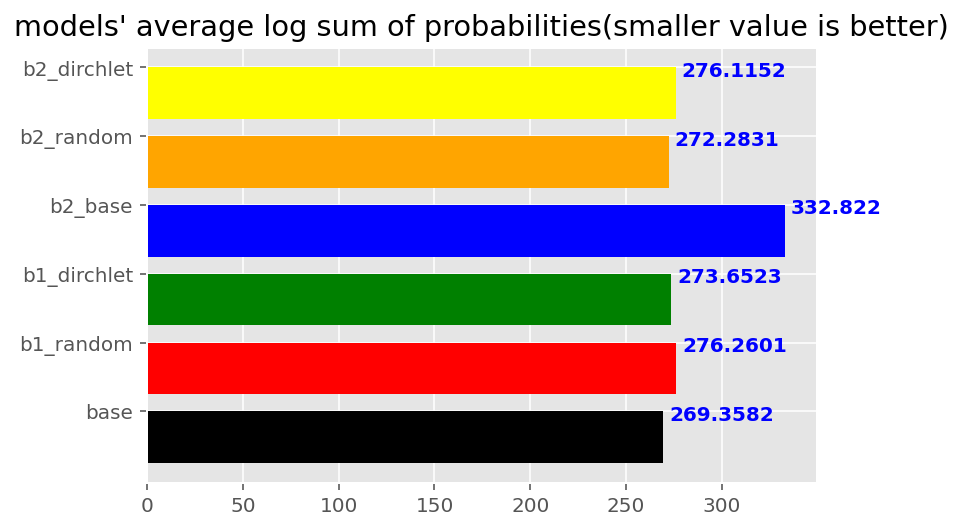

In [12]:
%%time
params['iterations'] = 3000
plot_comparison(params)